In [33]:
# A running example of how to use the ontology
from PJO1 import  *

import networkx as nx
import matplotlib.pyplot as plt

# get the classes (types) of the individual
get_class  = lambda x: [(x.name,'rdf:type',cls.name) for cls in x.is_a]

# get properties for a given individual it return a tuple of a triplet.
get_properties = lambda x: [(x.name, prop.name, getattr(x, prop.name)) for prop in x.get_properties()]

def get_properties(individual):
    '''
    A method to return triplets of the form (subject, predicate, object) for the classes of the individual
    '''
    triples = []
    for prop in individual.get_properties():
        value = getattr(individual, prop.name)
        if isinstance(value, list):
            for v in value:
                triples.append((individual.name, prop.name, v.name if hasattr(v, 'name') else v))
        else:
            triples.append((individual.name, prop.name, value.name if hasattr(value, 'name') else value))   
    return triples


def get_triples(individual):
    return get_class(individual) + get_properties(individual)




In [42]:

# Example RDF triples

def draw_k_graph(triples):
    '''
    A method to draw a knowledge graph from a list of triples representing the encounter the patient had
    '''
    
    plt.figure(figsize=(10, 8))  # width=10, height=8 inches
    G = nx.DiGraph()
    for s, p, o in triples:
        G.add_edge(s, o, label=p)

    pos = nx.circular_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1000, font_size=10)

    # Draw edge labels (properties)
    edge_labels = nx.get_edge_attributes(G, 'label')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size = 8)
    plt.show()
    plt.savefig("knowledge_graph_encounter.png")  # Save the graph as a PNG file


In [46]:
## Scenario Scheduling
patient1 = Patient("patient1")
patient1.hasAge = 45  # Assigning an age to the patient
patient1.hasName = "John Adams" # Assigning a name to the patient
patient1.hasId = "A12345" # Assigning an ID to the patient
#
schedule = InteractionType("Scheduling")
schedule.hasTimestamp = "2025-09-09 12:00:00"
patient1.hasPatientInteraction = schedule







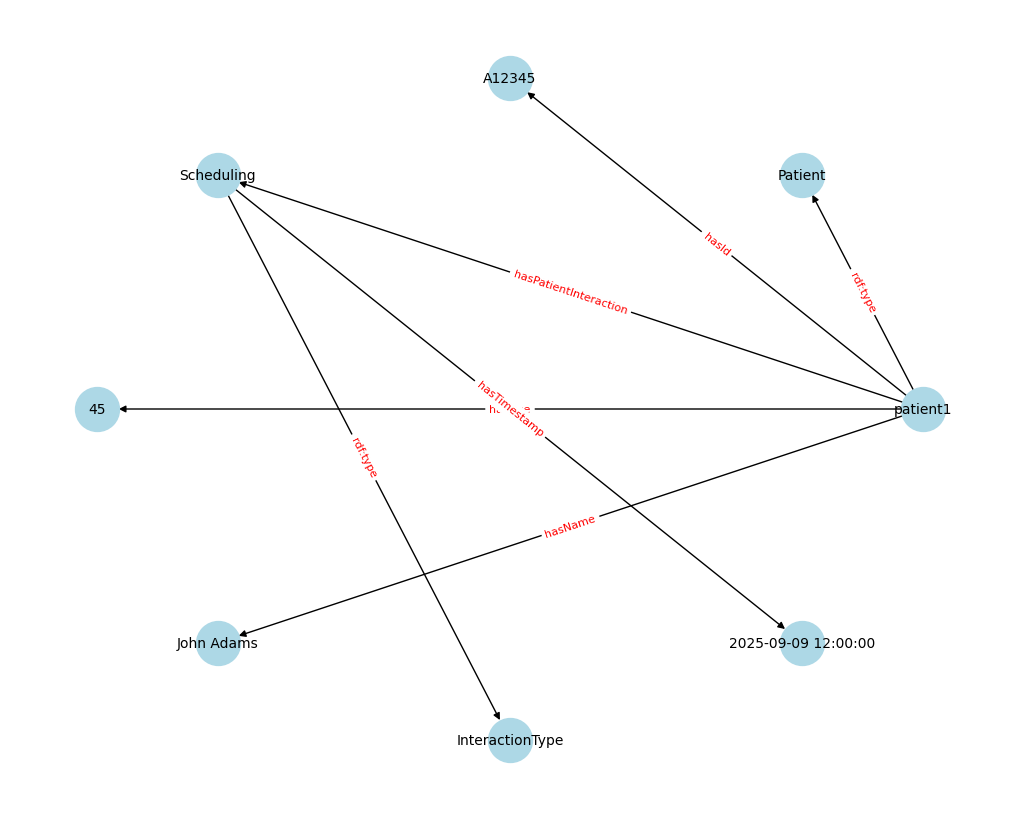

<bound method Ontology.save of get_ontology("http://test.org/healthops.owl#")>

<Figure size 640x480 with 0 Axes>

In [47]:
triples = get_triples(patient1) + get_triples(schedule)
draw_k_graph(triples)

destroy_entity(patient1)
destroy_entity(schedule)
hoo.save

In [72]:
## Scenario : Preop visit
from PJO1 import *
patient1 = Patient("patient1")
patient1.hasId = "A12345" # Assigning an ID to the patient

encounter = InteractionType("encounter") 
encounter.hasPurpose = "Preop Visit"  # this could be tied into  CPT/icd codes
encounter.hasPlannedTimestamp = "2025-11-01 09:00:00" # time set in the future for the appointment
encounter.hasActualTimestamp = "2025-11-01 09:10:00" # time stamp captured when actually patient steps into the room
patient1.hasPatienttInteraction = encounter
#
th = ModalityType('Telehealth')
patient1.hasPatientInteraction = encounter



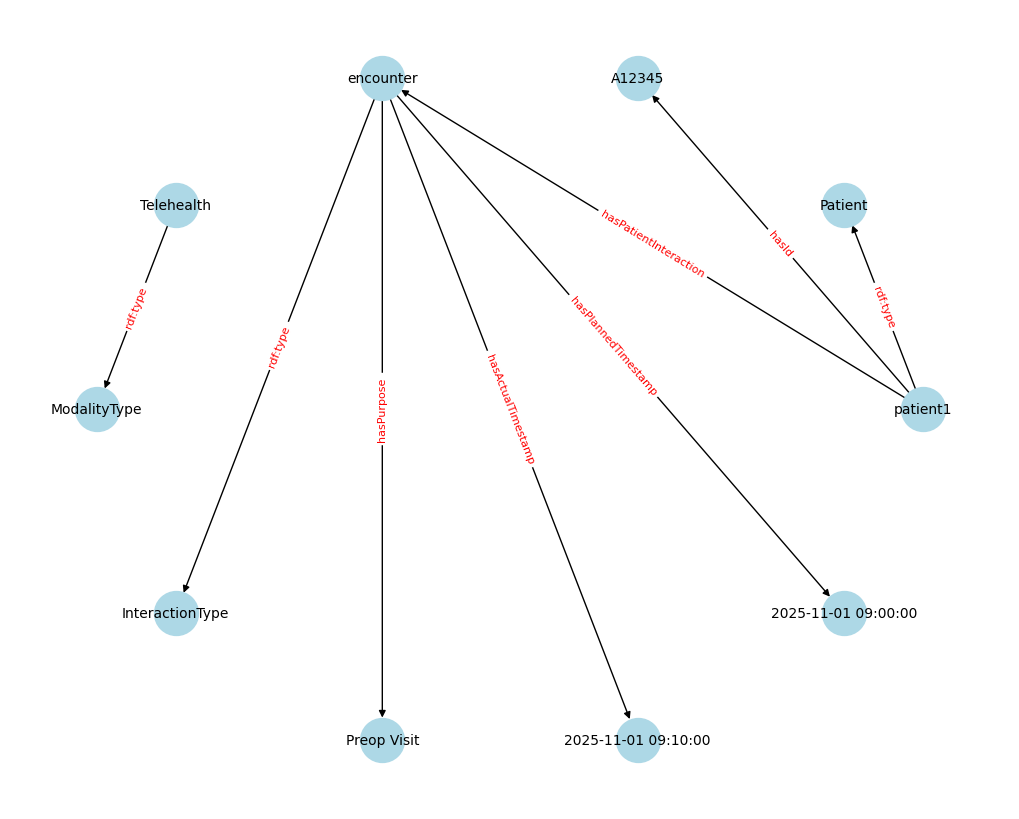

<bound method Ontology.save of get_ontology("http://test.org/healthops.owl#")>

<Figure size 640x480 with 0 Axes>

In [73]:
triples = get_triples(patient1)+get_triples(th)+get_triples(encounter)
draw_k_graph(triples)
destroy_entity(patient1)
destroy_entity(th)
hoo.save

In [70]:
print(triples)

[('patient1', 'rdf:type', 'Patient'), ('patient1', 'usesModality', 'Telehealth'), ('patient1', 'hasId', 'A12345'), ('Telehealth', 'rdf:type', 'ModalityType'), ('encounter', 'rdf:type', 'InteractionType'), ('encounter', 'hasPurpose', 'Preop Visit'), ('encounter', 'hasActualTimestamp', '2025-11-01 09:10:00'), ('encounter', 'hasPlannedTimestamp', '2025-11-01 09:00:00')]


In [56]:
## Scenario: Follow up visit

In [57]:
## Scenario: Payment event

In [58]:
### Scenario : Surgery
patient1 = Patient("patient1")
patient1.hasAge = 45  # Assigning an age to the patient
patient1.hasName = "John Adams" # Assigning a name to the patient
patient1.hasId = "A12345" # Assigning an ID to the patient
# Define a procedure and link it to the patient
rpp = Procedure("rpp")
#patient1.hasUndergoneProcedure.append(rpp)
#
rpp.procedurePerformedOn.append(patient1)
# Define an interaction type and link it to the patient
f2f = InteractionType("f2f")

patient1.hasPatientInteraction = f2f
rpp.hasTimestamp = "2023-10-01T10:00:00"
patient1.hasProcedureDoneDatetime = rpp.hasTimestamp


In [59]:
triples1 = get_triples(patient1)
# get the relationship for patient1
print(triples1)

[('patient1', 'rdf:type', 'Patient'), ('patient1', 'hasAge', 45), ('patient1', 'hasId', 'A12345'), ('patient1', 'hasName', 'John Adams'), ('patient1', 'hasPatientInteraction', 'f2f'), ('patient1', 'hasUndergoneProcedure', 'rpp'), ('patient1', 'hasProcedureDoneDatetime', '2023-10-01T10:00:00')]


In [60]:
triples2 = get_triples(rpp)
# the relationship for  the procedure

In [61]:
triples = triples1 + triples2

In [62]:
triples

[('patient1', 'rdf:type', 'Patient'),
 ('patient1', 'hasAge', 45),
 ('patient1', 'hasId', 'A12345'),
 ('patient1', 'hasName', 'John Adams'),
 ('patient1', 'hasPatientInteraction', 'f2f'),
 ('patient1', 'hasUndergoneProcedure', 'rpp'),
 ('patient1', 'hasProcedureDoneDatetime', '2023-10-01T10:00:00'),
 ('rpp', 'rdf:type', 'Procedure'),
 ('rpp', 'hasTimestamp', '2023-10-01T10:00:00'),
 ('rpp', 'procedurePerformedOn', 'patient1')]

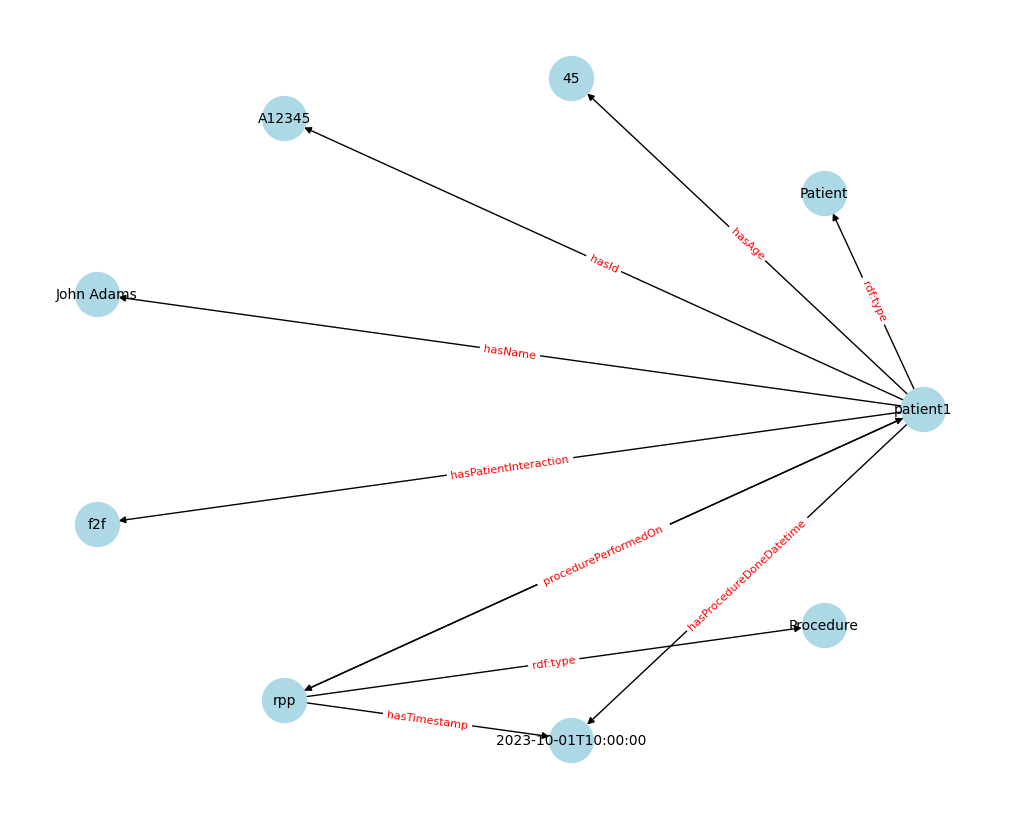

<Figure size 640x480 with 0 Axes>

In [63]:
draw_k_graph(triples)